In [1]:
import sys
import os
import random
sys.path.append(os.path.abspath('../'))

In [2]:
import networkx as nx

from Classes.BiasedInfluenceGraph import *
from Classes.WordGenerator import *

# Opinion Evolution in network with bias function in R and M

In [3]:
# -------------- Define dictionaries to store unique values for each pair of nodes -------------
# Unique sigma value for each pair
sigma_values = {}

back_values = {}

# Unique influence value for each pair
influence_values = {}

def get_unique_random_sigma_for_pair(e):
    if e not in sigma_values:
        sigma_values[e] = random.uniform(0.001, 4)
    return sigma_values[e]

def get_unique_random_back_for_pair(e):
    if e not in back_values:
        back_values[e] = -1 * random.uniform(1, 2)
    return back_values[e]

def get_unique_random_influence_for_pair(e):
    if e not in influence_values:
        influence_values[e] = random.uniform(0, 1)
    return influence_values[e]

def get_unique_random_influence_consensus_for_pair(e):
    if e not in influence_values:
        try:
            s = sigma_values[e]
            influence_values[e] = random.uniform(0, 1 / s) if s >= 1 else random.uniform(0, 1)
        except KeyError:
            influence_values[e] = random.uniform(0, 1)
    return influence_values[e]

# ------------------------- Definition of bias functions -------------------------

# I region
def ins(G,e):
    return 0

# if sigma between 0 and 1, lin is in R, else if sigma > 1, lin is in M
def lin(G, e):
    sigma = get_unique_random_sigma_for_pair(e)
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return sigma * x

# R region
def conf(G, e):
    delta = 0.01
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return x*(1 + delta - abs(x))/(1+delta)

# M region
def fan(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return 0 if x == 0 else x/abs(x)

# B region
def neg_lin(G, e):
    back = get_unique_random_back_for_pair(e)
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return back * x 

# B region
def backf(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return -(x ** 3)

# ------------------------- Definition of influence functions -------------------------

def random_inf(G, e):
    return get_unique_random_influence_for_pair(e)

def random_inf_consensus(G, e):
    return get_unique_random_influence_consensus_for_pair(e)

### Opinion evolution with linear bias function in R and M

True


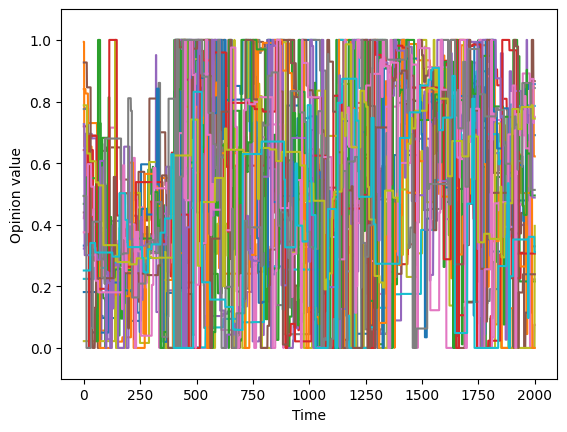

In [ ]:
n = 20
p = 0.4
B0 = []

sigma_values = {}
influence_values = {}

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=random_inf,bias_fn=lin)

word_len = 100*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

Opinion evolution with linear bias function in R and M. $\sigma_{ji} \cdot I_{ij} < 1$. For every $\sigma_{ji} \in (0,1)$ the condition will always fulfilled, this is for every linear function in R.

True


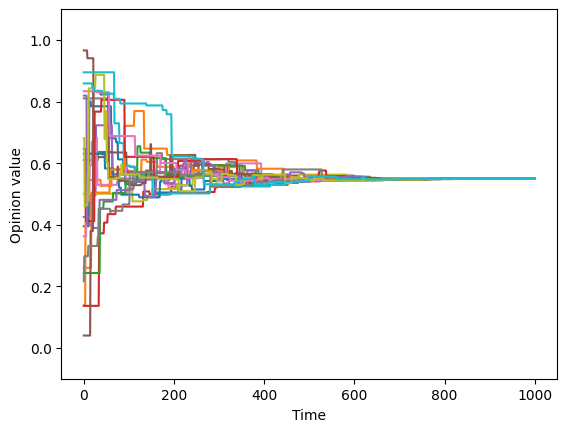

In [ ]:
n = 20
p = 0.4
B0 = []

sigma_values = {}
influence_values = {}

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=random_inf_consensus,bias_fn=lin)

word_len = 50*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

## Opinion evolution with linear function (Regions R and M) and ins function (I)

Erdös-Renyi Graph with a random value of $I_{ij}$ and a random bias function between $ins$ and $lin$. 

In [4]:
bias_fn = {}
influence_values = {}

def random_lin_ins(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    if e not in bias_fn:
        bias_fn[e] = random.choices([lin, ins])[0]
    
    return bias_fn[e](G,e)

True


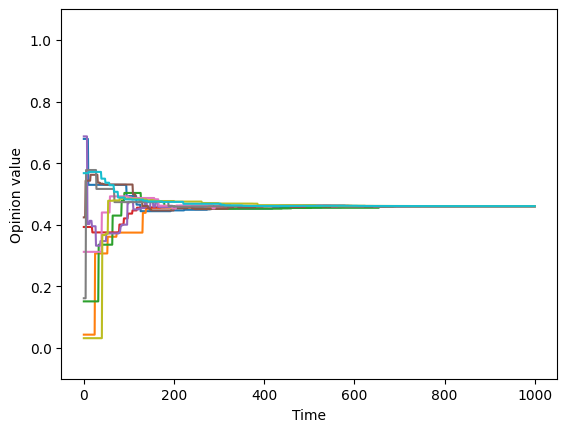

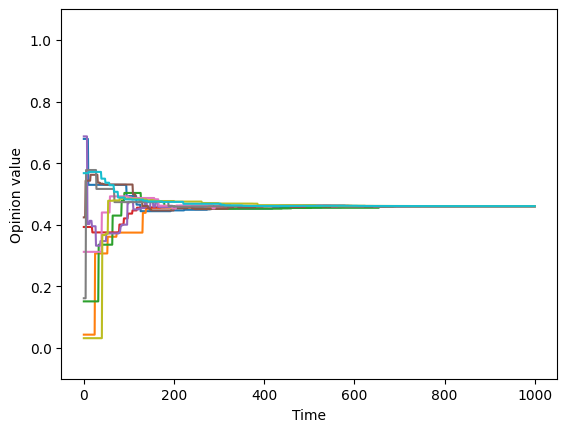

In [5]:
n = 10
p = 0.4

bias_fn = {}
sigma_values = {}
influence_values = {}
B0 = []

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=random_inf_consensus,bias_fn=random_lin_ins)

word_len = 100*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

Creating a strongly connected graph with agents wit bias function $lin$, where $\sigma_{ji} \cdot I_{ij} < 1$. Then, we complete the graph where the missing connections will have the $ins$ bias function.

In [94]:
n = 10
p = 0.4
is_strongly_connected = False

# Create graph
while not is_strongly_connected:
    graph=nx.fast_gnp_random_graph(n, p, directed=True)
    edges = graph.edges()
    is_strongly_connected = nx.is_strongly_connected(graph)

# Generate complete graph
k = nx.complete_graph(n,create_using=nx.DiGraph)
all_edges = k.edges()

# Find missing edges
missing_edges =  list(set(all_edges) - set(edges))

In [95]:
def lin_ins(G, e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    if e in missing_edges:
        sigma = get_unique_random_sigma_for_pair(e)
        return sigma * x
    else:
        return 0


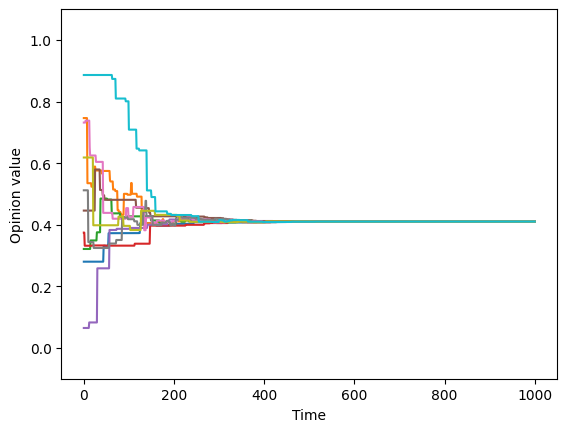

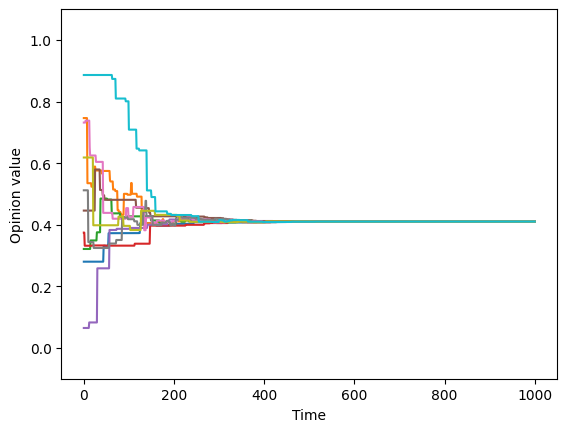

In [96]:
sigma_values = {}
influence_values = {}

B0 = []

G = BiasedInfluenceGraph(n,G=k, ops=B0, influence_fn=random_inf_consensus,bias_fn=lin_ins)

word_len = 100*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution()

Runs only with $lin_{ji}$ edges to check convergence speed

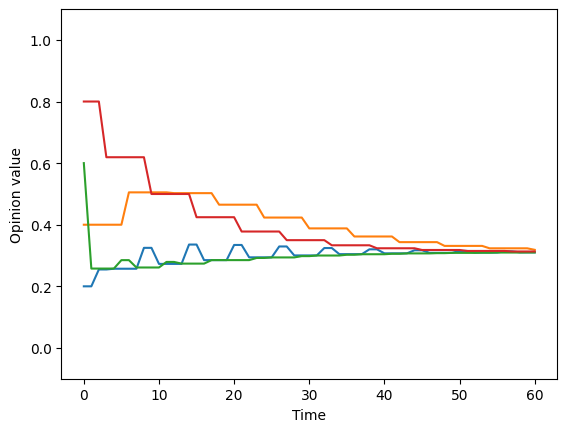

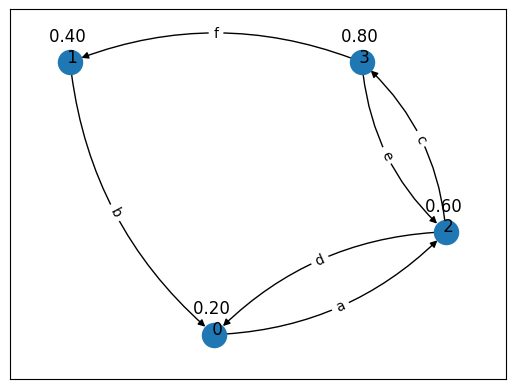

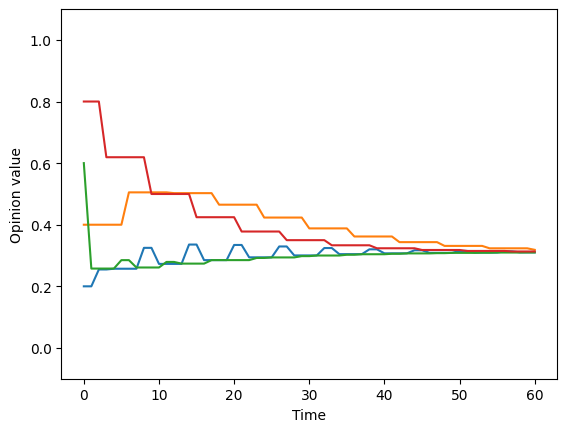

In [116]:
node = [0,1,2,3]
edges = [(2, 3), (3, 2), (1, 0), (3, 1), (2, 0), (0, 2)]    

sigma_values = {(2,3): 0.5, (3,2): 0.5, (1,0): 0.5, (3,1): 0.5, (2,0): 2, (0,2): 2}
influence_values = {}
missing_edges = edges

graph = nx.DiGraph()
graph.add_nodes_from(node)
graph.add_edges_from(edges)

G = BiasedInfluenceGraph(4,G=graph, ops=[0.2,0.4,0.6,0.8], influence_fn=random_inf_consensus,bias_fn=lin_ins)
G.draw()
G.execute_word("abcdef"*10)

G.plot_opinion_evolution()

Consider missing edges as connection where bias function is $ins$

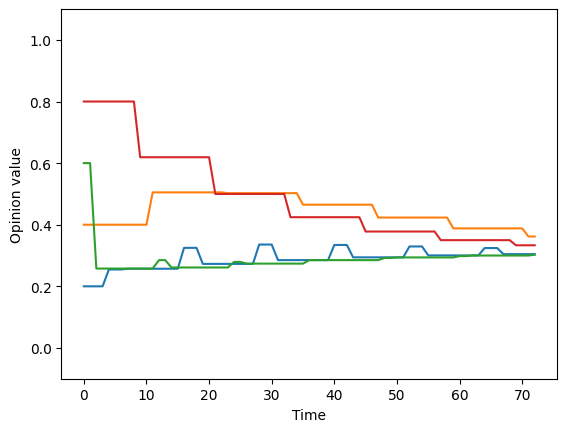

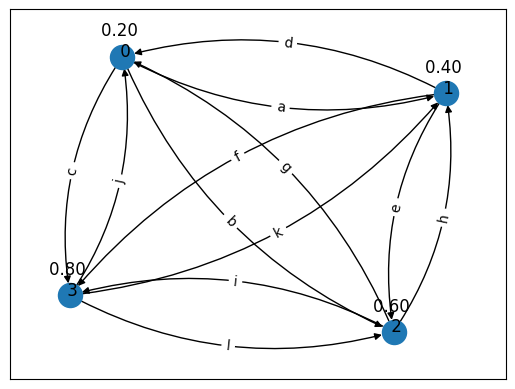

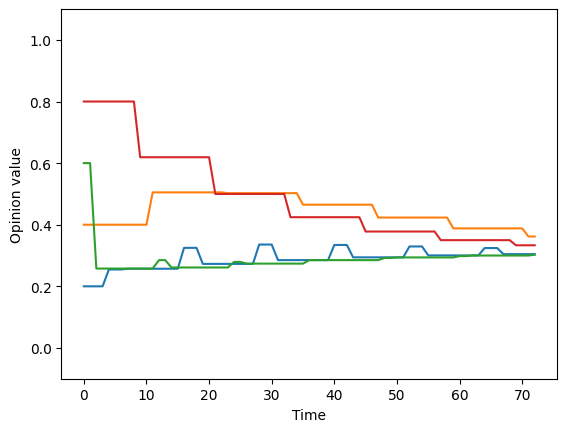

In [121]:
G = BiasedInfluenceGraph(4,G=nx.complete_graph(len(node),create_using=nx.DiGraph), ops=[0.2,0.4,0.6,0.8], influence_fn=random_inf_consensus,bias_fn=lin_ins)
G.draw()
G.execute_word("abcdefghijkl"*6)

G.plot_opinion_evolution()

The network tends to consensus if the original graph converge to consensus, executing edges with $ins$ bias function slows the convergence speed

## Opinion Evolution with bias function in all regions

In [9]:
funcs = [ins, lin, conf, fan, neg_lin, backf]

def random_bias_fun(G,e):
    if e not in bias_fn:
        bias_fn[e] = random.choices(funcs)[0]
    return bias_fn[e](G,e)

def random_lin_fun(G,e):
    if e not in bias_fn:
        bias_fn[e] = lin
    return bias_fn[e](G,e)

## Random Networks

Is not possible to guarantee consensus, due to closed-minded agents that could "break" the connectivity of the network or due to backfire agents that tends to distance their opinion from another agents

True


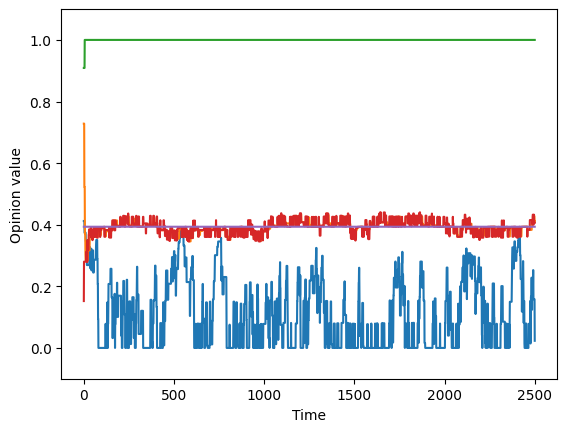

In [ ]:
bias_fn = {}
sigma_values = {}
back_values = {}
influence_values = {}

B0 = []
n = 5
p = 0.4

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n,p), ops=B0, influence_fn=random_inf,bias_fn=random_bias_fun)
print(nx.is_strongly_connected(G))

word_len = 500*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution()

In [299]:
bias_fn

{(4, 3): <function __main__.conf(G, e)>,
 (0, 3): <function __main__.ins(G, e)>,
 (3, 1): <function __main__.conf(G, e)>,
 (3, 0): <function __main__.conf(G, e)>,
 (0, 2): <function __main__.neg_lin(G, e)>,
 (3, 4): <function __main__.ins(G, e)>,
 (1, 3): <function __main__.fan(G, e)>,
 (2, 0): <function __main__.backf(G, e)>}